In [7]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(a.transpose())

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


/data/lvm/sci/agcam/east/20221026/lvm.sci.agcam.east_00000482.fits
det: 9 med: 12 sep 12


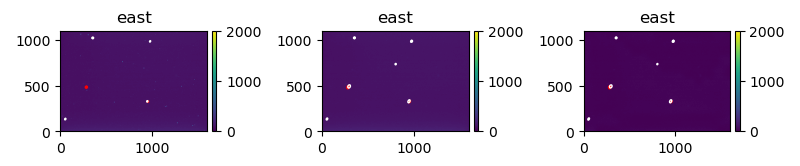

/data/lvm/sci/agcam/east/20221026/lvm.sci.agcam.east_00000483.fits
det: 8 med: 12 sep 14


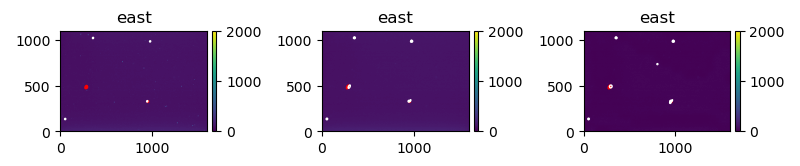

/data/lvm/sci/agcam/east/20221026/lvm.sci.agcam.east_00000484.fits
det: 9 med: 11 sep 12


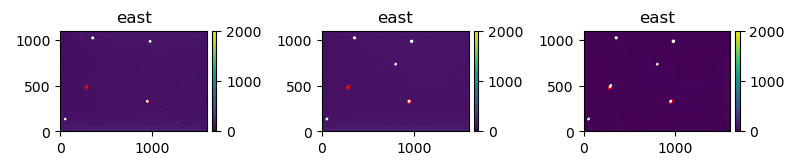

In [1]:
%matplotlib widget
#%matplotlib inline

import numpy as np
import sep
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import median_filter

from plotimg import plot_images
from lvmagp.images import Image
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection

#source_detection = SepSourceDetection()
source_detection = SepSourceDetection(threshold= 4.0, minarea=24.0)

fbase = lambda idx: f"/data/lvm/sci/agcam/east/20221026/lvm.sci.agcam.east_{idx:08}.fits"

off=482

for i in range(3):
    print(fbase(i+off))
    img_med = img_det = img_sep = Image.from_file(fbase(i+off))
    img_med = img_det = img_sep

    img_det = await source_detection(img_det)
    img_det.catalog.sort("peak")
    img_det.catalog.reverse()
    #print(img_det.catalog[img_det.catalog["fwhm"] > 4.0])
    
    img_med.data = median_filter(img_med.data, size=2)
    img_med = await source_detection(img_med)
    img_med.catalog.sort("peak")
    img_med.catalog.reverse()
    #print(img_med.catalog[img_med.catalog["fwhm"] > 4.0])
    
    bkg = sep.Background(img_sep.data.astype(float))
    img_sep.data = img_sep.data.astype(float) - bkg
    img_sep = await source_detection(img_sep)
    img_sep.catalog.sort("peak")
    img_sep.catalog.reverse()
    #print(img_med.catalog[img_med.catalog["fwhm"] > 4.0])

    print(f"det: {len(img_det.catalog)} med: {len(img_med.catalog)} sep {len(img_sep.catalog)}")


    cat_extra=None
#    cat_extra=[{'x': 820, 'y': 742, 'a': 10, 'b': 10, 'theta': 0}]
    
#    plot_images([img_det, img_med, img_sep], rotate=[1,0,1], vmax=300, cat_max=42, cat_extra=cat_extra)
    plot_images([img_det, img_med, img_sep], vmax=2000, cat_max=3, cat_rest=True, cat_extra=cat_extra)
#    plot_images([img_det, img_sep], vmax=500)


In [ ]:

img_det.catalog.sort("fwhm")
img_det.catalog.reverse()
img_det.catalog[img_det.catalog["fwhm"] > 6.0]